# Question 1

text pre-processing:

In [179]:
# imports

import io
import pandas as pd
import re
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer
import pprint
import csv
#use to split tarin and test set
from sklearn.model_selection import train_test_split
#use for benchmark function
from time import time
from sklearn import metrics
# makeplot function
import matplotlib.pyplot as plt
import numpy as np
#use for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB

import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
#define list of stopwords and stemmer
stop_words = stopwords.words('english') + list(string.punctuation)
stemmer = SnowballStemmer("english")
path="/content/drive/My Drive/Colab Notebooks/"

In [0]:
def clean(text):
    strAns = ""
    if(pd.isnull(text)):
        return (strAns)
    emoticons_str = r"""
        (?:
            [:=;] # Eyes
            [oO\-]? # Nose (optional)
            [D\)\]\(\]/\\OpP] # Mouth
        )"""

    regex_str = [
        emoticons_str,
        r'<[^>]+>',  # HTML tags
        r'(?:@[\w_]+)',  # @-mentions
        r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",  # hash-tags
        r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',  # URLs
        r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
        r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
        r'(?:[\w_]+)',  # other words
        r'(?:\S)'  # anything else
    ]

    tokens_re = re.compile(r'(' + '|'.join(regex_str) + ')', re.VERBOSE | re.IGNORECASE)
    emoticon_re = re.compile(r'^' + emoticons_str + '$', re.VERBOSE | re.IGNORECASE)

    text = re.sub(r'[^\x00-\x7f]*', r'', text)
    twitAfterTokenize = tokens_re.findall(text)
    twitAfterTokenize = [token if emoticon_re.search(token) else token.lower() for token in twitAfterTokenize]
    filteredTwit = [word for word in twitAfterTokenize if word not in stop_words]
    twitAfterStemming = [stemmer.stem(word) for word in filteredTwit] #stem each word in the text
    return twitAfterStemming

In [182]:
from google.colab import drive
drive.mount('/content/drive')
#global variables for tokens gender distribution
terms_male = []
terms_female = []
terms_brand = []
countMale=0
countFemale=0
countBrand=0

def genderDistribution(tokens,line,gender_idx):
    for token in tokens:
        if token not in stop_words:
            if re.sub(r'\b[0-9]+\b\s*', '', token) == '':
                continue;
            # if  (token.startswith('#') and token not in stop):
            if line[gender_idx] == 'male':
                terms_male.append(token)
            else:
                if line[gender_idx] == 'female':
                    terms_female.append(token)
                else:
                    if line[gender_idx] == 'brand':
                        terms_brand.append(token)
cleanTextToDF=[]
genderToDF = []


female_words={}
male_words={}
brand_words={}

with open("/content/drive/My Drive/Colab Notebooks/gender-classifier-DFE-791531.csv",encoding='utf8',  errors='ignore') as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    headers = next(reader)
    text_idx = headers.index('text')
    description_idx = headers.index('description')
    gender_idx = headers.index('gender')
    genderConfidence=headers.index('gender:confidence')
    genders=['male','female','brand']
    terms_male = []
    terms_female = []
    terms_brand = []

    for line in reader:
        tokensText = clean(line[text_idx])
        genderDistribution(tokensText,line,gender_idx)
        tokensDescription = clean(line[description_idx])
        genderDistribution(tokensDescription, line, gender_idx)
        gender=line[gender_idx]
        if line[gender_idx] == 'male':
            countMale+=1
        elif line[gender_idx] == 'female':
            countFemale+=1
        elif line[gender_idx] == 'brand':
            countBrand+=1
        descriptionStr = ' '.join(tokensDescription)
        textStr = ' '.join(tokensText)
        text=textStr+' '+descriptionStr
        if(line[genderConfidence]=='1' and gender in genders):
            cleanTextToDF.append(text)
            genderToDF.append(line[gender_idx])

data={'gender':genderToDF,'text':cleanTextToDF}
twitterDataSet=pd.DataFrame(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


class distribution:

In [183]:
# Results...
count_male = Counter()
count_male.update(terms_male)
pp = pprint.PrettyPrinter()

print("Male most common:", sum(count_male.values()))
pp.pprint(count_male.most_common(20))
print("")

count_female = Counter()
count_female.update(terms_female)
print("Female most common:", sum(count_female.values()))
pp.pprint(count_female.most_common(20))
print("")

count_brand = Counter()
count_brand.update(terms_brand)
print("Brand most common:", sum(count_brand.values()))
pp.pprint(count_brand.most_common(20))

# todo: print how many men and women 

Male most common: 106750
[('love', 670),
 ("i'm", 598),
 ('like', 574),
 ('get', 559),
 ('one', 422),
 ('go', 413),
 ('make', 397),
 ('time', 388),
 ('life', 364),
 ('follow', 341),
 ('fan', 336),
 ('day', 310),
 ('know', 291),
 ('new', 285),
 ('peopl', 283),
 ('good', 276),
 ('live', 275),
 ('music', 273),
 ('game', 269),
 ('__', 263)]

Female most common: 102897
[('love', 985),
 ("i'm", 888),
 ('like', 711),
 ('get', 556),
 ('__', 517),
 ('one', 507),
 ('make', 498),
 ('go', 496),
 ('day', 459),
 ('life', 454),
 ('time', 430),
 ('follow', 409),
 ('girl', 358),
 ('want', 341),
 ('peopl', 329),
 ('know', 320),
 ('live', 312),
 ('thing', 301),
 ('new', 292),
 ('best', 276)]

Brand most common: 98177
[('weather', 2327),
 ('get', 1511),
 ('updat', 1381),
 ('channel', 1218),
 ('news', 600),
 ('follow', 420),
 ('us', 419),
 ('new', 386),
 ('love', 310),
 ('make', 298),
 ('like', 295),
 ('tweet', 287),
 ('one', 273),
 ('best', 269),
 ('world', 259),
 ('game', 234),
 ('help', 231),
 ('twitter

 terms frequency for the different genders:

In [0]:
#train a machine learning model
textsAfterClean = twitterDataSet['text']
genders=twitterDataSet['gender']
x_train, x_test, y_train, y_test = train_test_split(textsAfterClean, genders, test_size=0.2)

# Question 2

In [0]:
# benchmark
#this function recieve: clf-the chosen classifier, x_train and x_test- BOW/TF-IDF matrix (from feature extraction)
#then train the model clf and return the results
def benchmark(clf, X_train, X_test):

    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [0]:
#function that receive the results of the training models and displays the comparison between them
def makePlot (results):
    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(4)]

    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)
    plt.show()

SVM
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.051s
test time:  0.001s
accuracy:   0.641
Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
train time: 0.066s
test time:  0.002s
accuracy:   0.667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


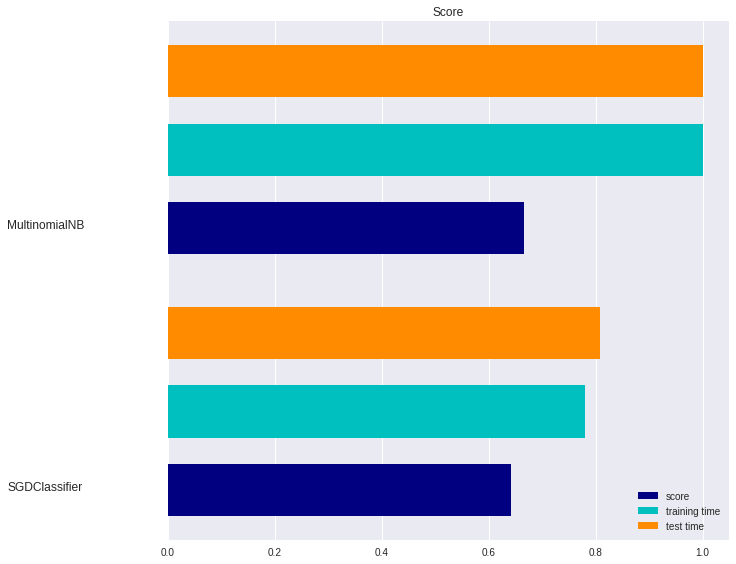

SVM
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.054s
test time:  0.002s
accuracy:   0.662
Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
train time: 0.059s
test time:  0.001s
accuracy:   0.635


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


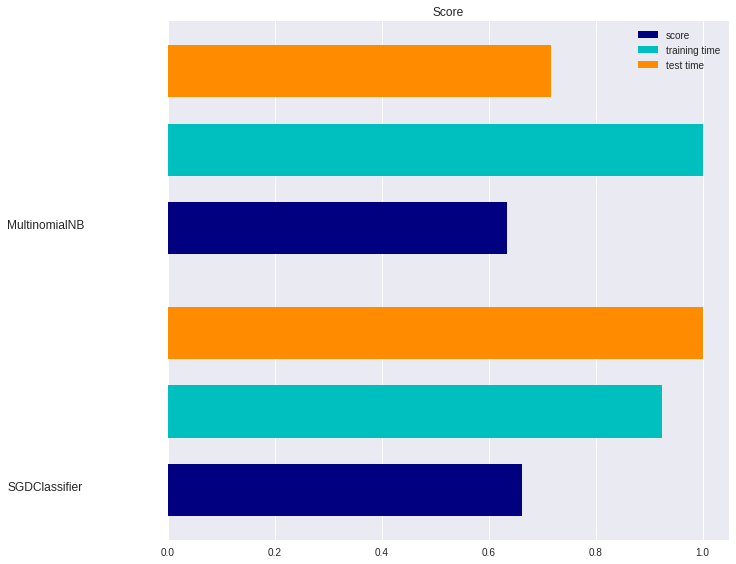

In [187]:
#feature extraction for NB
def trainNBnSVM(x_train,x_test):
  vectorizer = CountVectorizer()
  BOW_train = vectorizer.fit_transform(x_train)
  BOW_test = vectorizer.transform(x_test)

  Tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
  Tfidf_train = Tfidf_vectorizer.fit_transform(x_train)
  Tfidf_test = Tfidf_vectorizer.transform(x_test)


  #results with BOW
  results_BOW = []
  for clf, name in (
          (SGDClassifier(),"SVM"),
          (MultinomialNB(),"Naive Bayes")):
      print('=' * 80)
      print(name)
      results_BOW.append(benchmark(clf, BOW_train,BOW_test))
  makePlot(results_BOW)

  #results with tfidf
  results_Tfidf = []
  for clf, name in (
          (SGDClassifier(),"SVM"),
          (MultinomialNB(),"Naive Bayes")):
      print('=' * 80)
      print(name)
      results_Tfidf.append(benchmark(clf, Tfidf_train,Tfidf_test))
  makePlot(results_Tfidf)
  
trainNBnSVM(x_train,x_test)

initialize data for training CNN model with keras

In [188]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout


  

top_words = 2000
textsAfterCleanList = textsAfterClean.tolist()
# create a new Tokenizer
tokenizer = Tokenizer(num_words=top_words, split=' ')
  # feed our texts to the Tokenizer
tokenizer.fit_on_texts(textsAfterCleanList)
  #get the max_text_length
X = tokenizer.texts_to_sequences(textsAfterCleanList)
X = pad_sequences(X)
max_text_length = X.shape[1]
  #we already split to train and test then use it here
  #convert train and test set to list of text (twitt+description)
x_train_NN = x_train.tolist()
x_test_NN = x_test.tolist()

  #build the x_train and x_test (texts_to_sequences- turns input into numerical arrays) and truncate and pad input sequences
x_train_NN = tokenizer.texts_to_sequences(x_train_NN)
x_train_NN = pad_sequences(x_train_NN, maxlen=max_text_length)

x_test_NN = tokenizer.texts_to_sequences(x_test_NN)
x_test_NN = pad_sequences(x_test_NN, maxlen=max_text_length)

  #change the y_train and y_test to matrix (size = 3 columns- binary 1\0)
y_train_NN = pd.get_dummies(y_train).values
y_test_NN = pd.get_dummies(y_test).values
  
  # create the CNN model
embedding_vector_length = 32
lstm_out = 196
batch_size = 128
  
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length = max_text_length))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
  #before training, we need to compile the network
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())
  #training the model
  
model.fit(x_train_NN, y_train_NN, validation_data=(x_test_NN,y_test_NN), epochs = 5, batch_size=batch_size)
  # Final evaluation of the model
scores = model.evaluate(x_test_NN, y_test_NN, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

 









_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 38, 32)            64000     
_________________________________________________________________
dropout_61 (Dropout)         (None, 38, 32)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 196)               179536    
_________________________________________________________________
dropout_62 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 591       
Total params: 244,127
Trainable params: 244,127
Non-trainable params: 0
_________________________________________________________________
None
Train on 11043 samples, validate on 2761 samples
Epoch 1/5
11043/11043 [==============================] - 26s 2ms/step - loss: 0.93

create CNN

Tune each model (NB+SVM) parameters to optimize the results using pipeline

find the best parameters for both the feature extraction-BOW and the classifier-Naive Bayes:

In [189]:
from sklearn.model_selection import GridSearchCV

svmResults  = []
NBResults = []

nb_clf1 = Pipeline([('vect', CountVectorizer()),('clf', MultinomialNB())])
parameters_clf1 =  {
    'vect__max_df': (0.3,0.5,1.0),
    'clf__alpha': (0.01,1.0),
    'clf__fit_prior':(False,True)}
gs_clf1 = GridSearchCV(nb_clf1, parameters_clf1, n_jobs=1)
gs_clf1 = gs_clf1.fit(x_train,y_train)
print('Best score: ',gs_clf1.best_score_)
NBResults.append(gs_clf1.best_score_)
print('Best params: ',gs_clf1.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best score:  0.656433940052522
Best params:  {'clf__alpha': 1.0, 'clf__fit_prior': True, 'vect__max_df': 0.5}


 find the best parameters for both the feature extraction-Tf idf and the classifier-Naive Bayes:

In [190]:
nb_clf2 = Pipeline([('vect', TfidfVectorizer()),('clf', MultinomialNB())])
parameters_clf2 =  {
    'vect__max_df': (0.3,0.5,1.0),
    'vect__sublinear_tf':(True, False),
    'clf__alpha': (0.01,1.0),
    'clf__fit_prior':(False,True)}
gs_clf2 = GridSearchCV(nb_clf2, parameters_clf2, n_jobs=1)
gs_clf2 = gs_clf2.fit(x_train,y_train)
NBResults.append(gs_clf2.best_score_)
print('Best score: ',gs_clf2.best_score_)
print('Best params: ',gs_clf2.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best score:  0.6402245766548945
Best params:  {'clf__alpha': 1.0, 'clf__fit_prior': False, 'vect__max_df': 0.5, 'vect__sublinear_tf': False}


find the best parameters for both the feature extraction-BOW and the classifier-SVM:

In [191]:
svm_clf3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SGDClassifier()),
])
parameters_clf3 = {
    'vect__max_df': (0.3,0.5,1.0),
    'clf__alpha': (0.001,0.0001,0.00001,0.000001),
    'clf__penalty': ('elasticnet','none', 'l2','l1'),
    'clf__epsilon':(0.1,0.2)}
gs_clf3 = GridSearchCV(svm_clf3, parameters_clf3, n_jobs=1)
gs_clf3 = gs_clf3.fit(x_train,y_train)
svmResults.append(gs_clf3.best_score_);
print('Best score: ',gs_clf3.best_score_)
print('Best params: ',gs_clf3.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Best score:  0.6384134745992937
Best params:  {'clf__alpha': 0.001, 'clf__epsilon': 0.1, 'clf__penalty': 'l2', 'vect__max_df': 1.0}


 find the best parameters for both the feature extraction-Tf idf and the classifier-SVM:

In [192]:
svm_clf4 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier()),
])
parameters_clf4 = {
    'vect__max_df': (0.3,0.5,1.0),
    'vect__sublinear_tf':(True, False),
    'clf__alpha': (0.001,0.0001,0.00001,0.000001),
    'clf__penalty': ('elasticnet','none', 'l2','l1'),
    'clf__epsilon':(0.1,0.2)}
gs_clf4 = GridSearchCV(svm_clf4, parameters_clf4, n_jobs=1)
gs_clf4 = gs_clf4.fit(x_train,y_train)
svmResults.append(gs_clf4.best_score_);
print('Best score: ',gs_clf4.best_score_)
print('Best params: ',gs_clf4.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Best score:  0.6424884542243956
Best params:  {'clf__alpha': 0.0001, 'clf__epsilon': 0.1, 'clf__penalty': 'elasticnet', 'vect__max_df': 0.5, 'vect__sublinear_tf': True}


Use the best models selected in the previous steps (NB+SVM) for prediction on the test set and present the accuracy for each machine learning model

Results of the model Naive Bayes (with the receive pipeline's parameters):

In [193]:
#Naive Bayes best with Bag of word
#Best params:  {clf__alpha': 1.0, 'clf__fit_prior': True, 'vect__max_df': 0.5}
count_vectorizer1 = CountVectorizer(max_df=0.5, stop_words='english')
count_train1 = count_vectorizer1.fit_transform(x_train)
print(x_test)
count_test1 = count_vectorizer1.transform(x_test)
results1 = []
clf_nb=MultinomialNB(fit_prior=True,alpha=1.0)
print("Naive Bayes BOW")
print(clf_nb)
results1.append(benchmark(clf_nb, count_train1,count_test1))

1644     averag american produc 10,000 gallon saliva ye...
8773     @kevhunni im alway like screw im take nap ill ...
8549     final #battleforthebon week we'll way 4 p ever...
519      feel like winter morn summer middl day fall ni...
9701     @lofticriii promis get medium actual want cont...
2932     i'v rage face entir weekend back realiti 3 hug...
9227     @143redangel ok angel thing happen reason know...
8639     5 fruit veget look suspici sexual click https:...
11603    yet anoth exampl failur verbal physic violent ...
10213    love someon much want destroy enough destroy m...
13535    @blakeshelton know that rumor start gwen oklah...
13306    livingston isd fuck scholarship lamar send dam...
2227     @reallysulk m8 suspens #blacklivesmatt #protec...
9202     gnat come banish social media major corpor all...
12617    bacon sausag process meat caus cancer world he...
12512    saw nikko hes aliv kickin anyon wonder say hi ...
10733    i'm play wordbrain i'v reach brain size 300 #w.

Results of the model SVM (with the receive pipeline's parameters):

In [194]:
#SVM best with tf-idf
#Best params: {'clf__alpha': 0.0001, 'clf__epsilon': 0.2, 'clf__penalty': 'elasticnet', 'vect__max_df': 0.5, 'vect__sublinear_tf': True}
Tfidf_vectorizer1 = TfidfVectorizer(max_df=0.5, sublinear_tf='False', stop_words='english')
Tfidf_train1 = Tfidf_vectorizer1.fit_transform(x_train)
Tfidf_test1 = Tfidf_vectorizer1.transform(x_test)
results2 = []
clf_svm=SGDClassifier(penalty='elasticnet', alpha=0.0001, epsilon=0.2)
print("SVM Tf-idf")
results2.append(benchmark(clf_svm, Tfidf_train1,Tfidf_test1))

SVM Tf-idf
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.2, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.079s
test time:  0.001s
accuracy:   0.661


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[link text](https:// [link text](https:// [link text](https://)))The Best Model: Naive Bayes with Best params ({clf__alpha': 1.[link text](https://)0, 'clf__fit_prior': True, 'vect__max_df': 0.5}) accuracy 67%

*   List item

*   List item

1.   List item
2.   List item


*   List item


*   List item


Q3. Using Twitter streaming API to collect 1000 tweets
Set the credential of our twitter App

In [0]:
import tweepy
from tweepy import OAuthHandler

consumer_key = 'jdIMepJyw9gUdpf20OIaAzFWI'
consumer_secret = 'lZy4vChSFlv0zFmTkIpAG5yDC5Ul8XwB3prKN9XaZzsxB0wEMf'
access_token = '217782300-XLO0Ooq2kQbX56zfJk5buS5L7xgrVOSPcbRRIjI3'
access_secret = 'KrrXztGAIvX0HG79VsyFokzpFjrj6my5xL32K86ZwRRLS'

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth)

def process_or_store(tweet):
    print(json.dumps(tweet))

In [0]:
# from tweepy import Stream
# from tweepy.streaming import StreamListener
# import json
# from google.colab import drive
# drive.mount('/content/drive')
 
# class MyListener(StreamListener):
 
#     def on_data(self, data):
#         try:
#             with open("/content/drive/My Drive/Colab Notebooks/python.json", 'a') as f:
#                 print(data)
#                 f.write(data)
#                 return True
#         except BaseException as e:
#             print("Error on_data: %s" % str(e))
#         return True
 
#     def on_error(self, status):
#         print(status)
#         return True
 
# twitter_stream = Stream(auth, MyListener())
# twitter_stream.filter(track=['#python'])

In [0]:
# # Imports/general tools
# import time

# # Imports/general tools/encoding stdout
# import sys
# import codecs

# # Import JSON parsing tools
# import json

# # Imports/tweepy specific
# from tweepy import Stream
# from tweepy import OAuthHandler
# from tweepy.streaming import StreamListener
# from google.colab import drive
# drive.mount('/content/drive')

# filename="/content/drive/My Drive/Colab Notebooks/men.json"
# class listener(StreamListener):

# 	def on_data(self, data):
# 		try:
			
# 			jsonData = json.loads(data)
			
# 			# alternative approach using json library (suggested by Satish Chandra)
# 			description = jsonData['user']['description']
#       #description = user['description']
# 			text = jsonData['text']


# 			# concatenate the timestamp, an arbitrary separator and the text of the tweet
# 			saveThis = description + ' ' + text

# 			# print to stdout
# 			print (jsonData)

# 			# open file for writing, in append mode so that updates don't erase previous work
# 			saveFile = open(filename, 'a')
			
# 			# set file encoding to utf-8 and write to file
# 			saveFile.write(saveThis)
# 			saveFile.write('\n')
# 			saveFile.close()
# 			return True
# 		except BaseException as e:
# 			print ('failed ondata, ', str(e))
# 			time.sleep(5)

# 	def on_error(self, status):
# 		print (status)

# # The meat of the script, authentication first, then streaming
# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# twizzer = Stream(auth, listener())

# # Set the search terms here! As far as I
# # can tell, adding multiple terms inside:
# #        track=['term1', 'term2', 'term_n']
# # returns the results of a Boolean OR
# twizzer.filter(track=['#sports','#videogames'])



In [205]:
from google.colab import drive
drive.mount('/content/drive')
def getInfoFromFile (fileName):
    twitterStreamingDataSet = []
    # read the input file
    with open(fileName, 'r') as f: 
        while True:
           # read the next line
            tweet = f.readline() 
            if not tweet: break
            # load it as Python dict
#  tweet = json.loads(line) 
            # get the text of the tweet
            terms_only = [term for term in clean(tweet)]
            terms_only_strings  = " ".join(terms_only)
            # add the new tweet to he tweets List
            twitterStreamingDataSet.append(terms_only_strings) 
    return twitterStreamingDataSet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
twitterStreamingDataSetMale = getInfoFromFile ('/content/drive/My Drive/Colab Notebooks/men.json');
#twitterStreamingDataSetFemale = getInfoFromFile ('women.json');
print(len(twitterStreamingDataSetMale))

FileNotFoundError: ignored

In [0]:
def getCommonTerms(twitterStreamingDataSet):
    allTermsList = []
    allTweets = twitterStreamingDataSet
    for tweet in allTweets:
        tweetTermsList = tweet.split()
        for term in tweetTermsList:
            allTermsList.append(term)
    #make list of all terms (transfer list of lists to one list)
    termsCounter = Counter(allTermsList)
    return (termsCounter.most_common(30))

df4 = pd.DataFrame(getCommonTerms(twitterStreamingDataSetMale), columns = ['Term', 'Count'])
print("")
print("***************************************************")
print("Top 30 most frequent terms in **Men** tweets new Dataset:")
print("***************************************************")
print (df4)

# df5 = pd.DataFrame(getCommonTerms(twitterStreamingDataSetFemale), columns = ['Term', 'Count'])
# print("")
# print("***************************************************")
# print("Top 30 most frequent terms in **women** tweets new Dataset:")
# print("***************************************************")
# print (df5)

# df6 = pd.DataFrame(getCommonTerms(twitterStreamingDataSetBrand), columns = ['Term', 'Count'])
# print("")
# print("***************************************************")
# print("Top 30 most frequent terms in **brand** tweets new Dataset:")
# print("***************************************************")
# print (df6)

Q4. Use the best gender classification prediction model which was trained on Q2 to predict the gender of the authors of collected tweets


### function that prepearing the test set before we activate the NN machine learning model on the test set:

In [0]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
# top_words = 2000
# trainCNN(top_words,twitterStreamingDataSetMale,x_train,x_test)
x_test2_NN = twitterStreamingDataSetMale
print(x_test2_NN)
#build the x_test (texts_to_sequences- turns input into numerical arrays) and truncate and pad input sequences
x_test2_NN = tokenizer.texts_to_sequences(x_test2_NN)
print(max_text_length)
x_test2_NN = pad_sequences(x_test2_NN, maxlen=max_text_length)

embedding_vector_length = 32
lstm_out = 196

# model=createCNN(embedding_vector_length,lstm_out)


male_cnt, not_male_cnt = 0, 0
for i in range(len(x_test2_NN)):  
    result = model.predict(x_test2_NN[i].reshape(1,max_text_length),batch_size=1,verbose = 0)[0]
    if (np.argmax(result) == 0):
        not_male_cnt += 1
    else:
        male_cnt += 1
print(not_male_cnt)
print(male_cnt)

In [0]:
male_acc = float(male_cnt)/float(len(x_test2_NN))
not_male_acc = float(not_male_cnt)/float(len(x_test2_NN))
print("The NN model classified a male; %f%% of the cases" % (male_acc*100))
print("The NN model classified a not male; %f%% of the cases" % (not_male_acc*100))

#### Present the prediction of the Naive Bayes model:

In [0]:
from sklearn.metrics import accuracy_score
data={'text':twitterStreamingDataSetMale}
dfMale=pd.DataFrame(data)
textAfterClean=pd.Series(dfMale['text'])
print(textAfterClean)
BOW_x_test = count_vectorizer1.transform(textAfterClean)
y_predicted = clf_nb.predict(BOW_x_test)
print(y_predicted)
gender_list = []
print(len(textAfterClean))
 #we assume all twitt need to be males
gender_list += len(dfMale) * ['male']
y_test = gender_list

# accuracy_score(y_test, y_predicted)
male_acc = accuracy_score(y_test, y_predicted)
female_acc = 1 - male_acc
print("The NB model classified a male; %f%% of the cases" % (male_acc*100))
print("The NB model classified a female; %f%% of the cases" % (female_acc*100))